### EDA Template


In [1]:
#Import required Python libraries
import pandas as pd

import mitosheet

import sweetviz as sv

#from pycaret.regression import *
from pycaret.classification import *

### Define your problem

To  predict whether a patient will be diagnosed with heart disease ?


In [2]:
#Load CSV file to pandas dataframe

allData = pd.read_csv('heart.csv')

In [3]:
#Get dataframe information

allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Display dataframe, first and last five rows

allData

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

                                             |          | [  0%]   00:00 -> (? left)


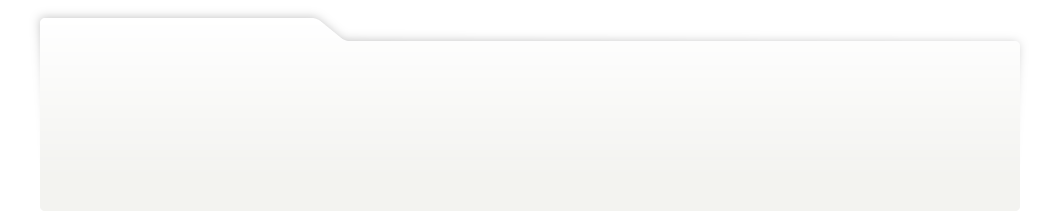
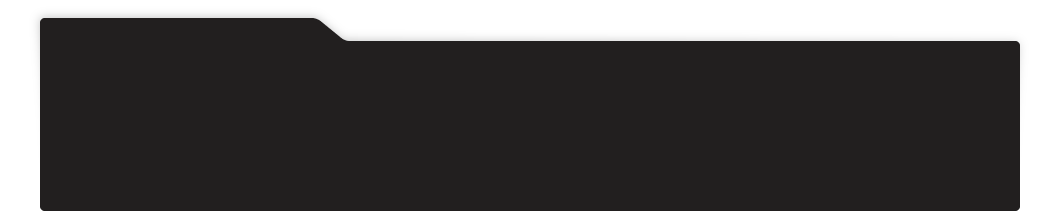
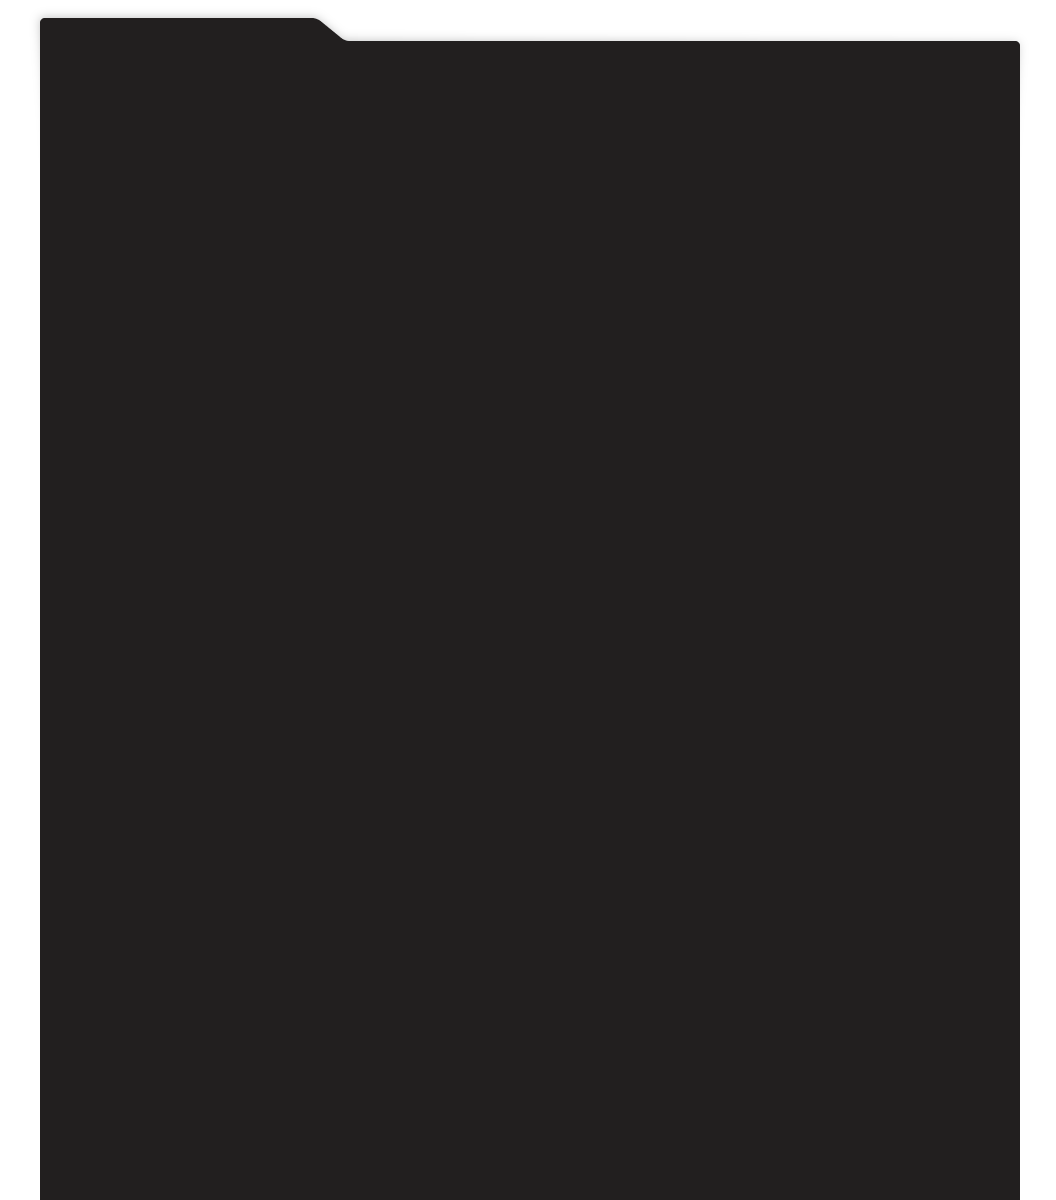
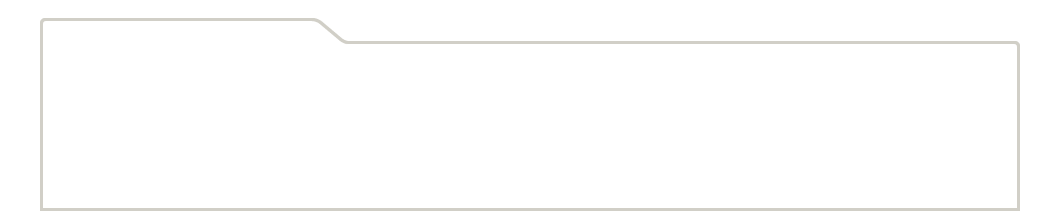
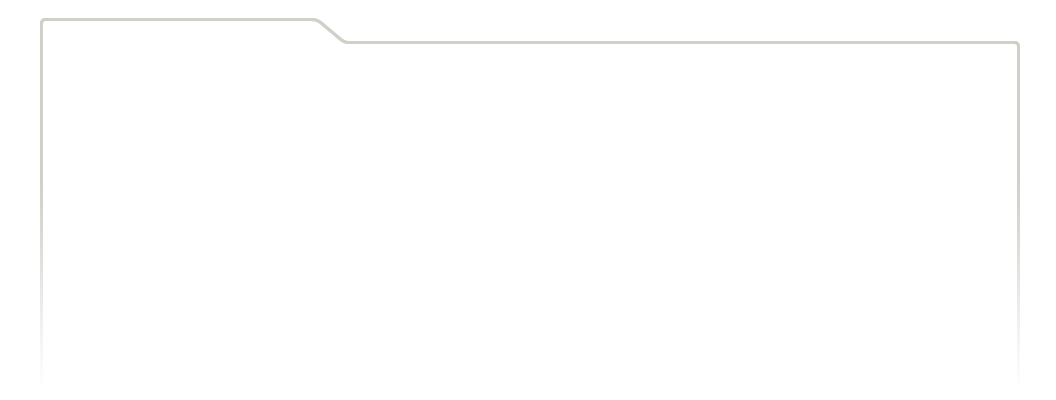
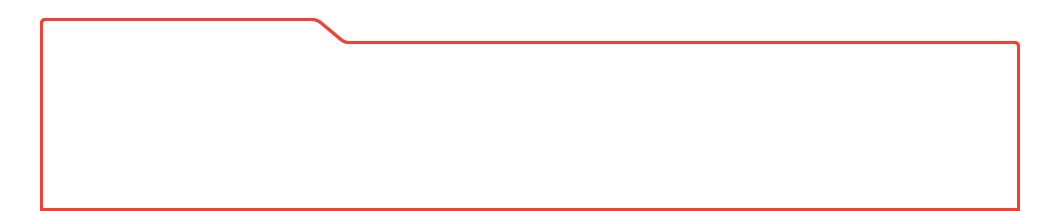
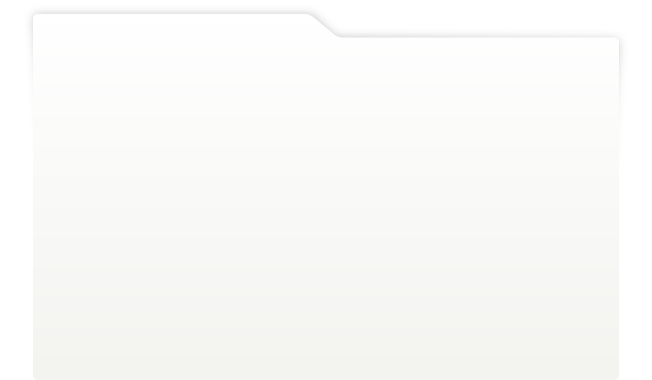
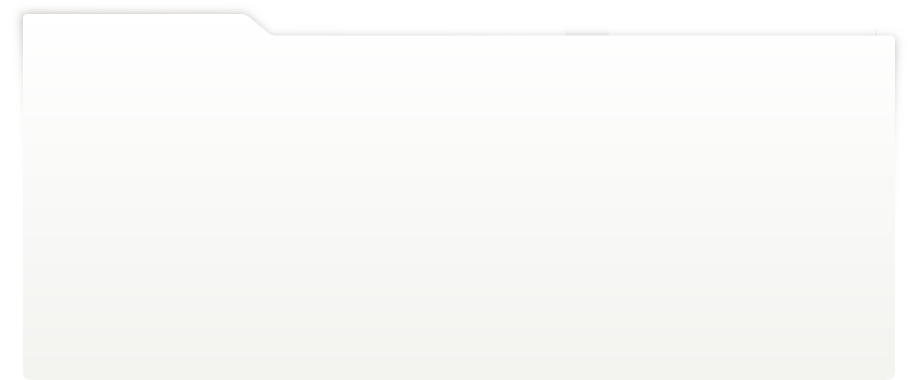
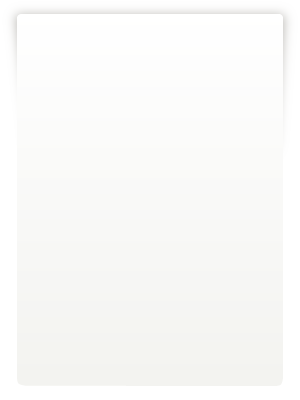
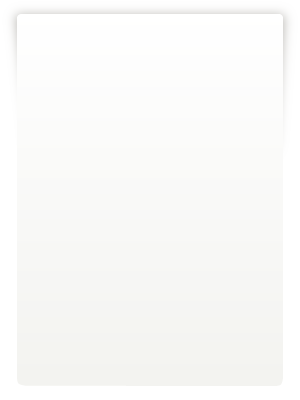
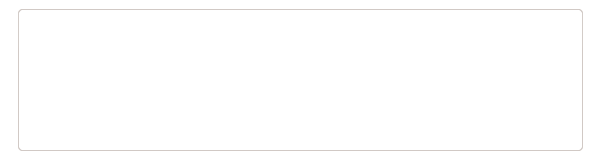
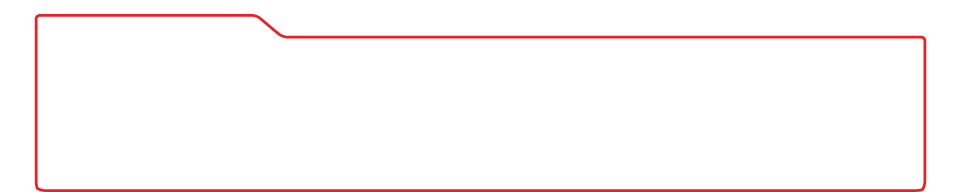
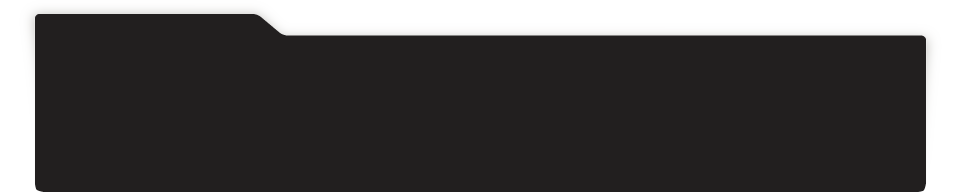
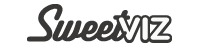
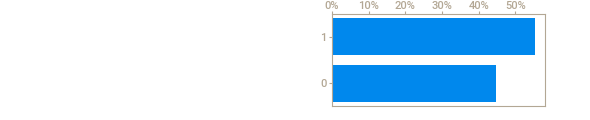
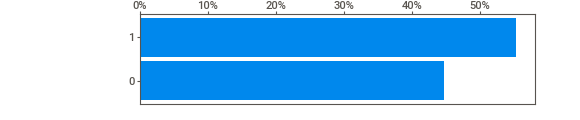
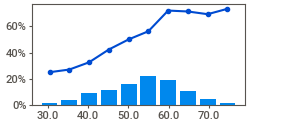
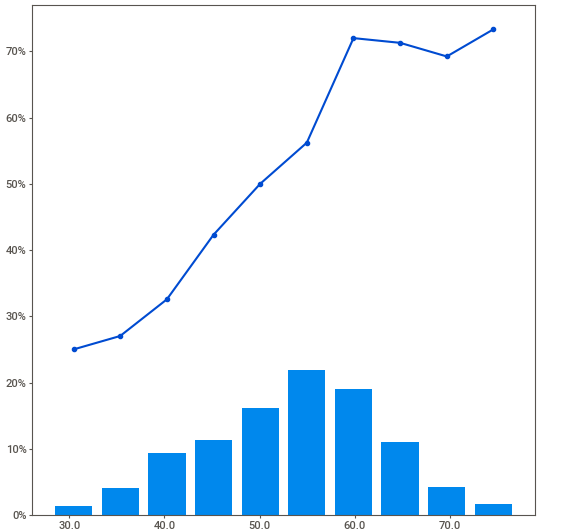
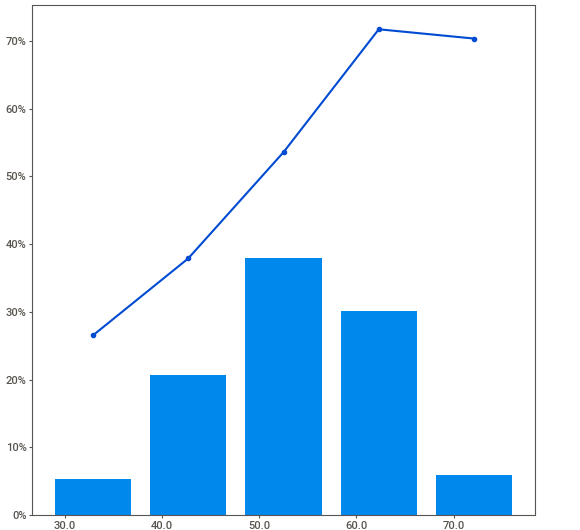
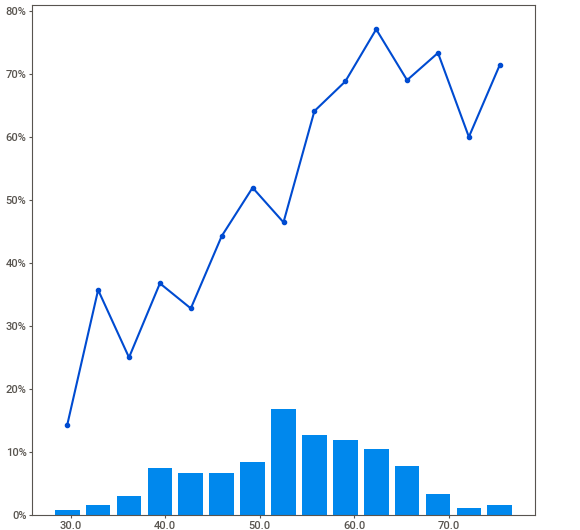
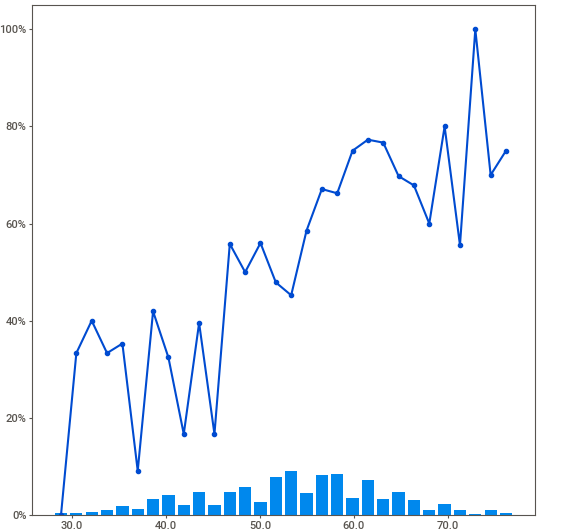
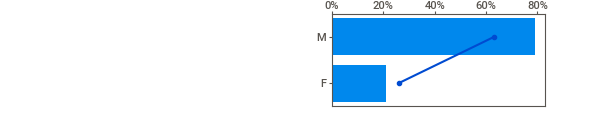
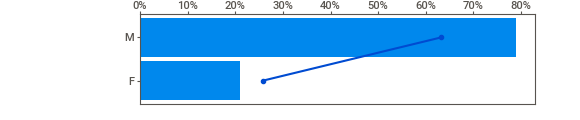
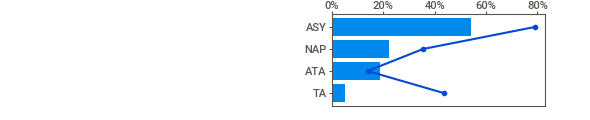
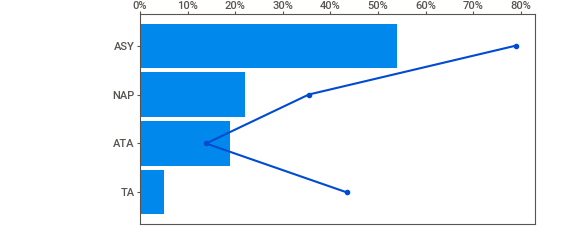
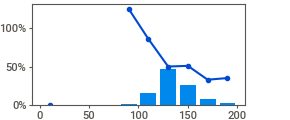
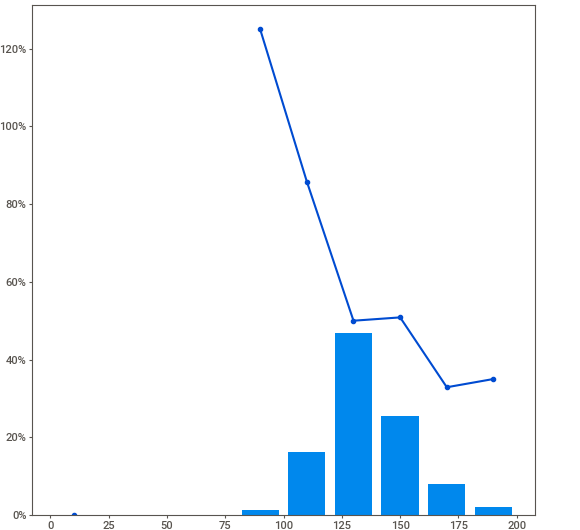
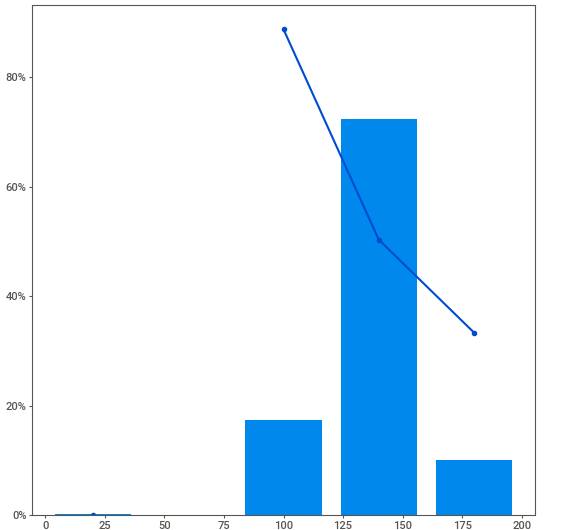
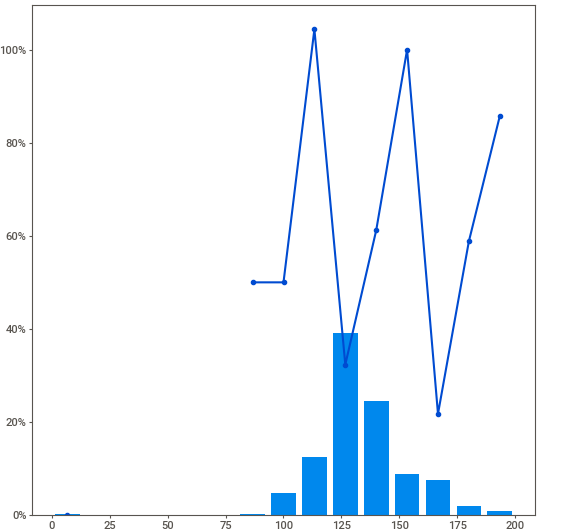
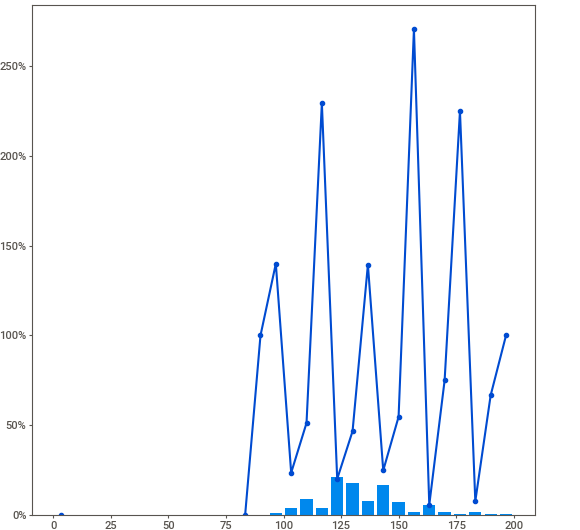
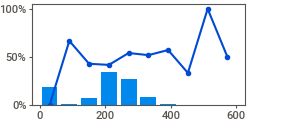
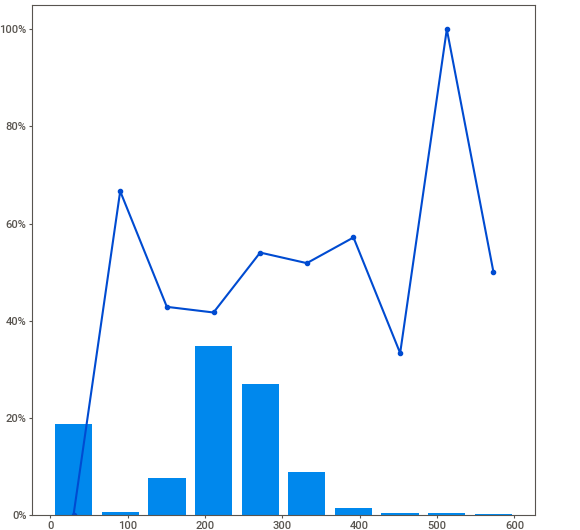
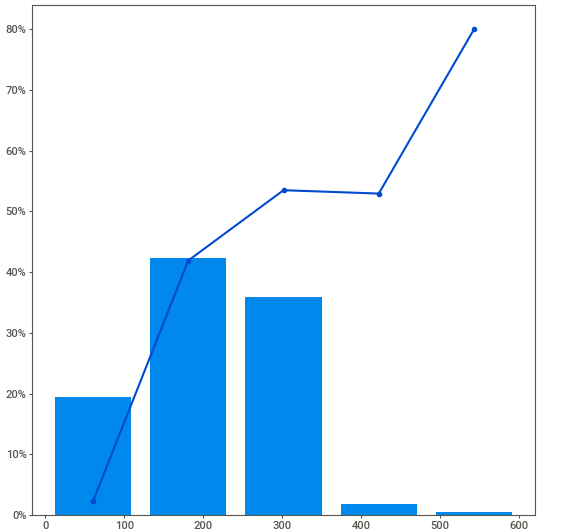
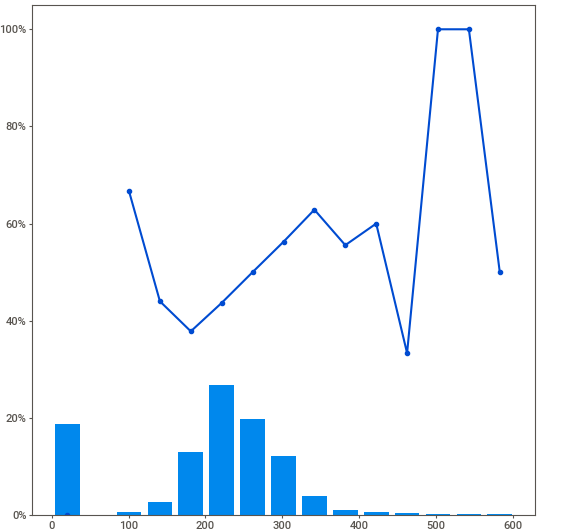
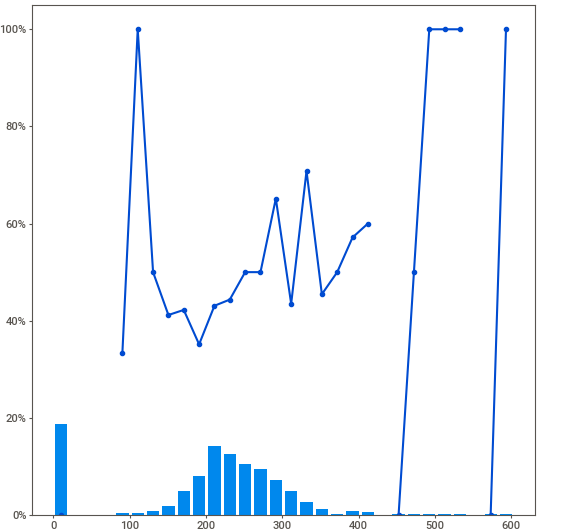
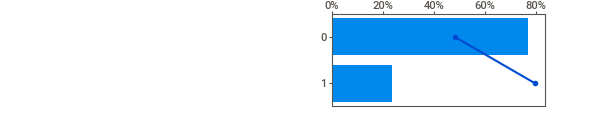
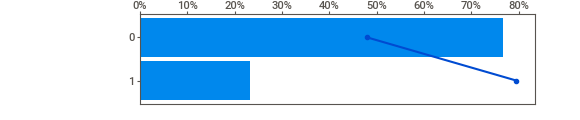
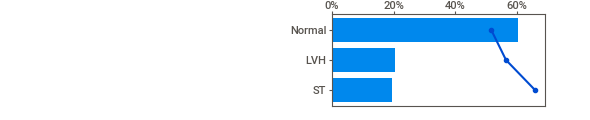
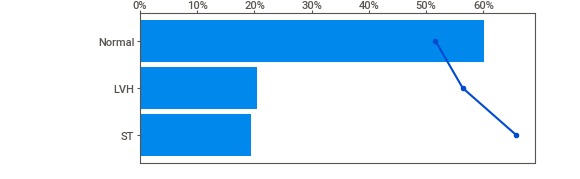
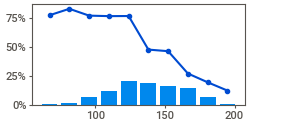
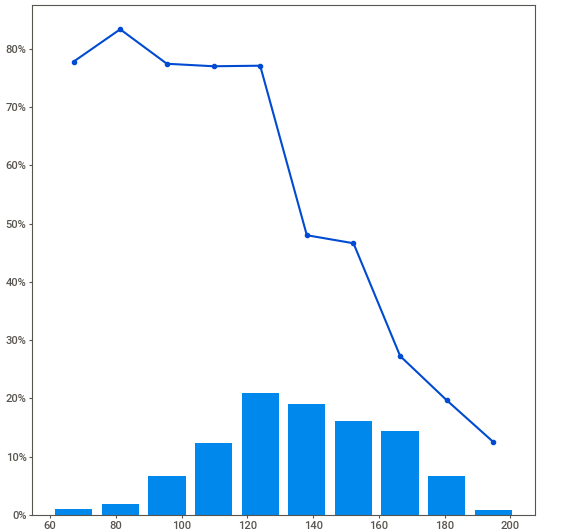
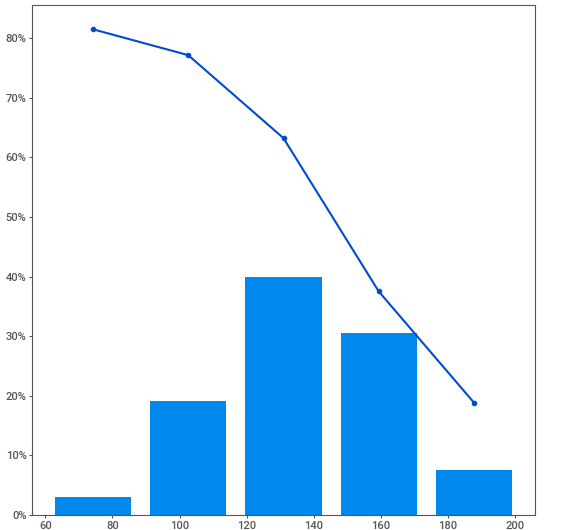
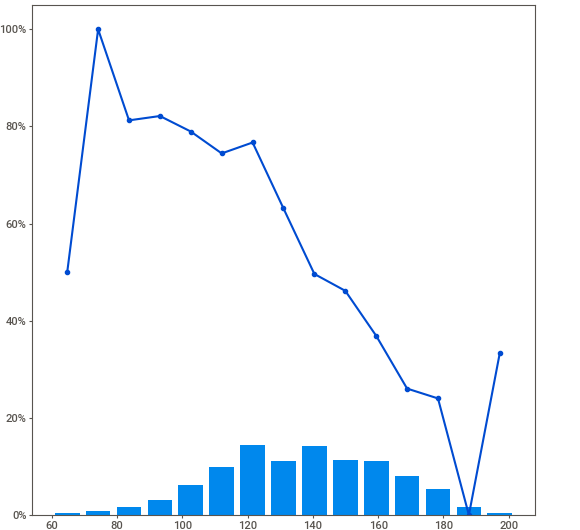
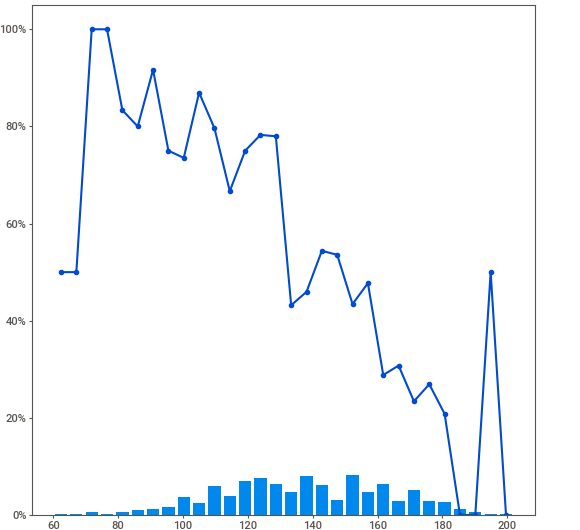
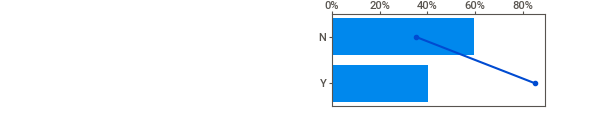
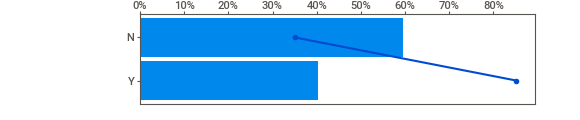
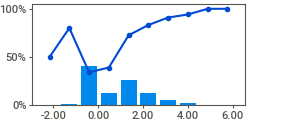
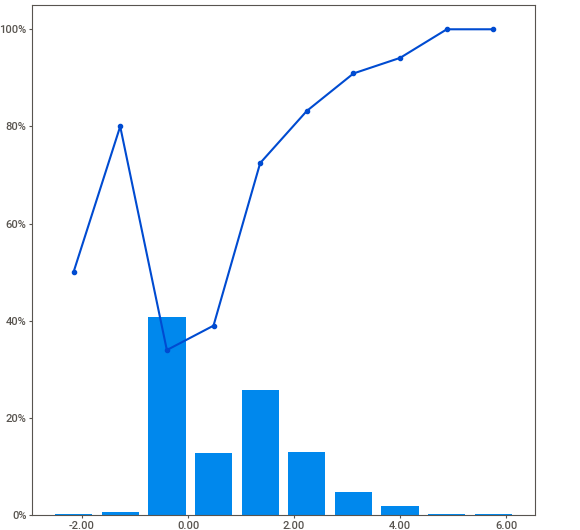
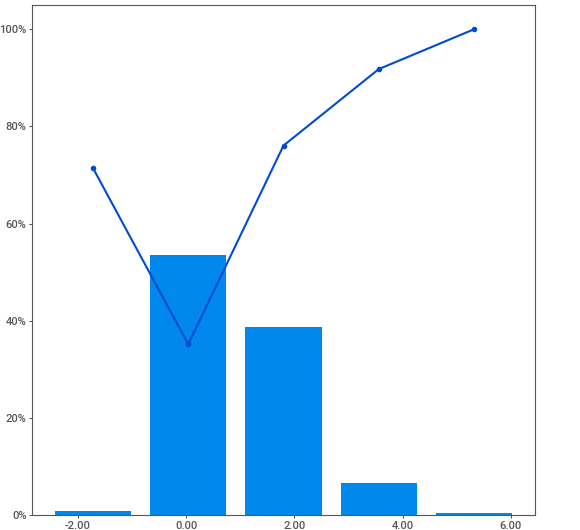
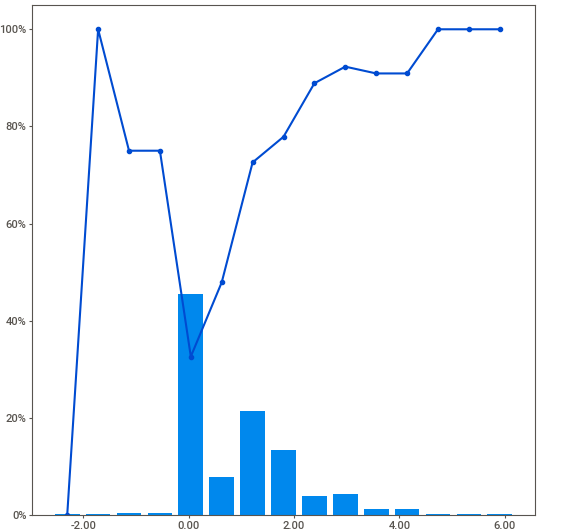
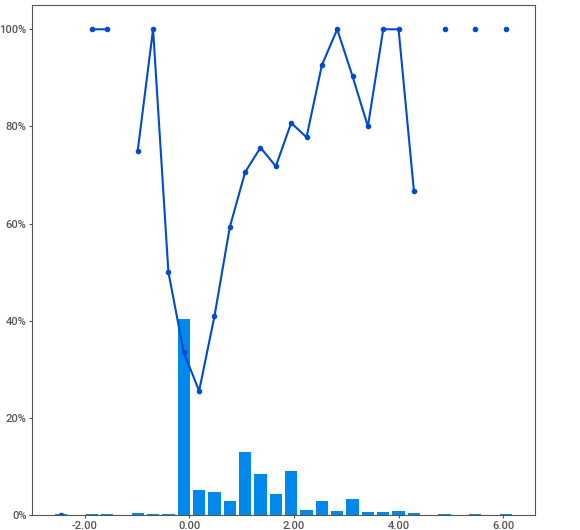
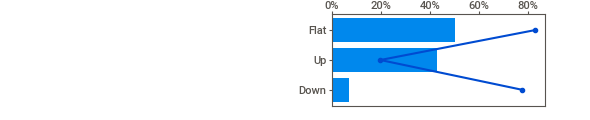
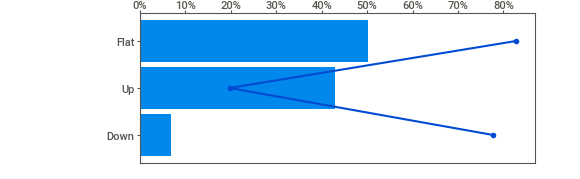
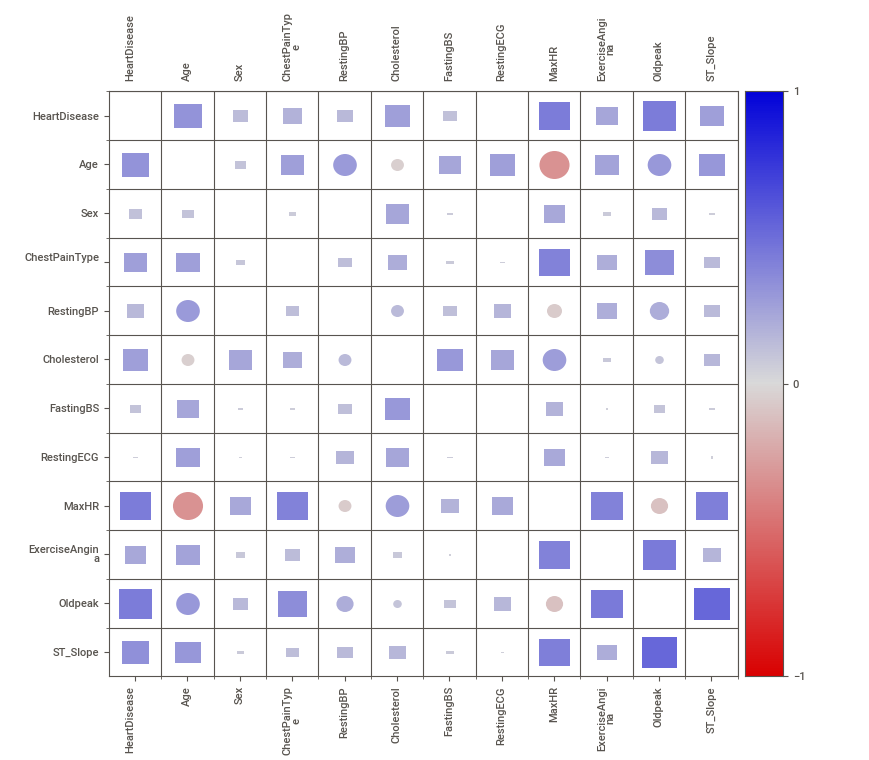
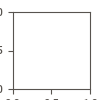

In [5]:
#Generate Sweetviz data report

datareport = sv.analyze(allData, target_feat='HeartDisease')
datareport.show_notebook(h='full')

The Heart Prediction dataset is a classification problem and the target feature is the Heart Disease.
From the above SweetViz Report we can deduce the following
1) There is a strong assosiation between Heart Disease and age,Cholestrol,MaxHR and Oldpeak
2) There is a weak assosiation between Heart Disease and Sex,ExerciseAngina,ST_Slope,ChestPainType,RestingBP,FastingBS
3) There is no assosiation between Heart Disease and Resting ECG

The Resting ECG Column would be dropped since there is no assosiation with the Heart Disease column and also dropping the Fasting BS Column due to little correlation between the Heart Disease Column

In [6]:
#Open dataframe in Mito

mitosheet.sheet(allData,analysis_to_replay="id-eepfythmju")

In [7]:
from mitosheet.public.v3 import *; register_analysis("id-eepfythmju");
# Deleted columns RestingECG
allData.drop(['RestingECG'], axis=1, inplace=True)

# Deleted columns FastingBS
allData.drop(['FastingBS'], axis=1, inplace=True)

# Added column new-column-21h0
allData.insert(1, 'new-column-21h0', 0)

# Renamed columns new-column-21h0Ag
allData.rename(columns={'new-column-21h0': 'new-column-21h0Ag'}, inplace=True)

# Renamed columns Age-Classification
allData.rename(columns={'new-column-21h0Ag': 'Age-Classification'}, inplace=True)

# Changed Age-Classification to dtype str
allData['Age-Classification'] = allData['Age-Classification'].astype('str')

# Set formula of Age-Classification
allData['Age-Classification'] = IF(allData['Age']<12,'Child',IF(allData['Age']<=20,'Teenagers',IF(allData['Age']<=60,'Adults','Old')))

# Set formula of Age-Classification
allData['Age-Classification'] = IF(allData['Age']<48,'Youth',IF(allData['Age']<=63,'Adults','Old'))


In [ ]:
from mitosheet.public.v3 import * register_analysis("id-eepfythmju");
# Deleted columns RestingECG
allData.drop(['RestingECG'], axis=1, inplace=True)

# Deleted columns FastingBS
allData.drop(['FastingBS'], axis=1, inplace=True)

# Added column new-column-21h0
allData.insert(1, 'new-column-21h0', 0)

# Renamed columns new-column-21h0Ag
allData.rename(columns={'new-column-21h0': 'new-column-21h0Ag'}, inplace=True)

# Renamed columns Age-Classification
allData.rename(columns={'new-column-21h0Ag': 'Age-Classification'}, inplace=True)

# Changed Age-Classification to dtype str
allData['Age-Classification'] = allData['Age-Classification'].astype('str')

# Set formula of Age-Classification
allData['Age-Classification'] = IF(allData['Age']<12,'Child',IF(allData['Age']<=20,'Teenagers',IF(allData['Age']<=60,'Adults','Old')))


In [ ]:
from mitosheet.public.v3 import *; register_analysis("id-eepfythmju");
# Deleted columns RestingECG
allData.drop(['RestingECG'], axis=1, inplace=True)

# Deleted columns FastingBS
allData.drop(['FastingBS'], axis=1, inplace=True)


In [ ]:
from mitosheet.public.v3 import *; register_analysis("id-tvwhykllxe");
# Dropped duplicates in allData
allData = allData.drop_duplicates(subset=['Age'], keep='first')

# Dropped duplicates in allData
allData = allData.drop_duplicates(subset=['Sex'], keep='first')

# Dropped duplicates in allData
allData = allData.drop_duplicates(subset=['ChestPainType'], keep='first')

# Dropped duplicates in allData
allData = allData.drop_duplicates(subset=['ChestPainType', 'Age'], keep='first')


                                             |          | [  0%]   00:00 -> (? left)


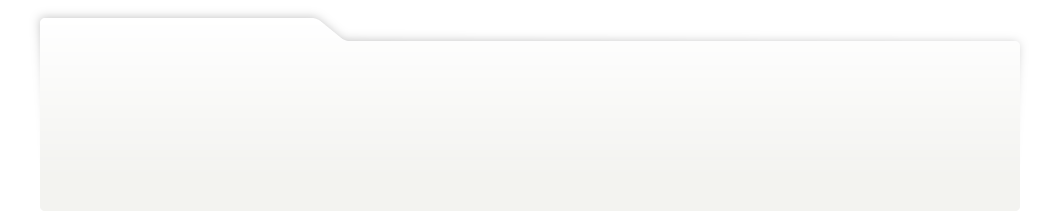
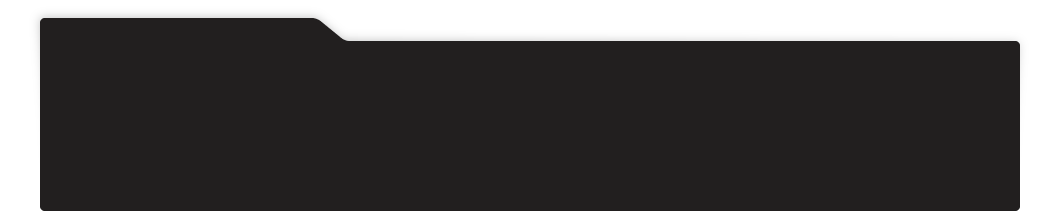
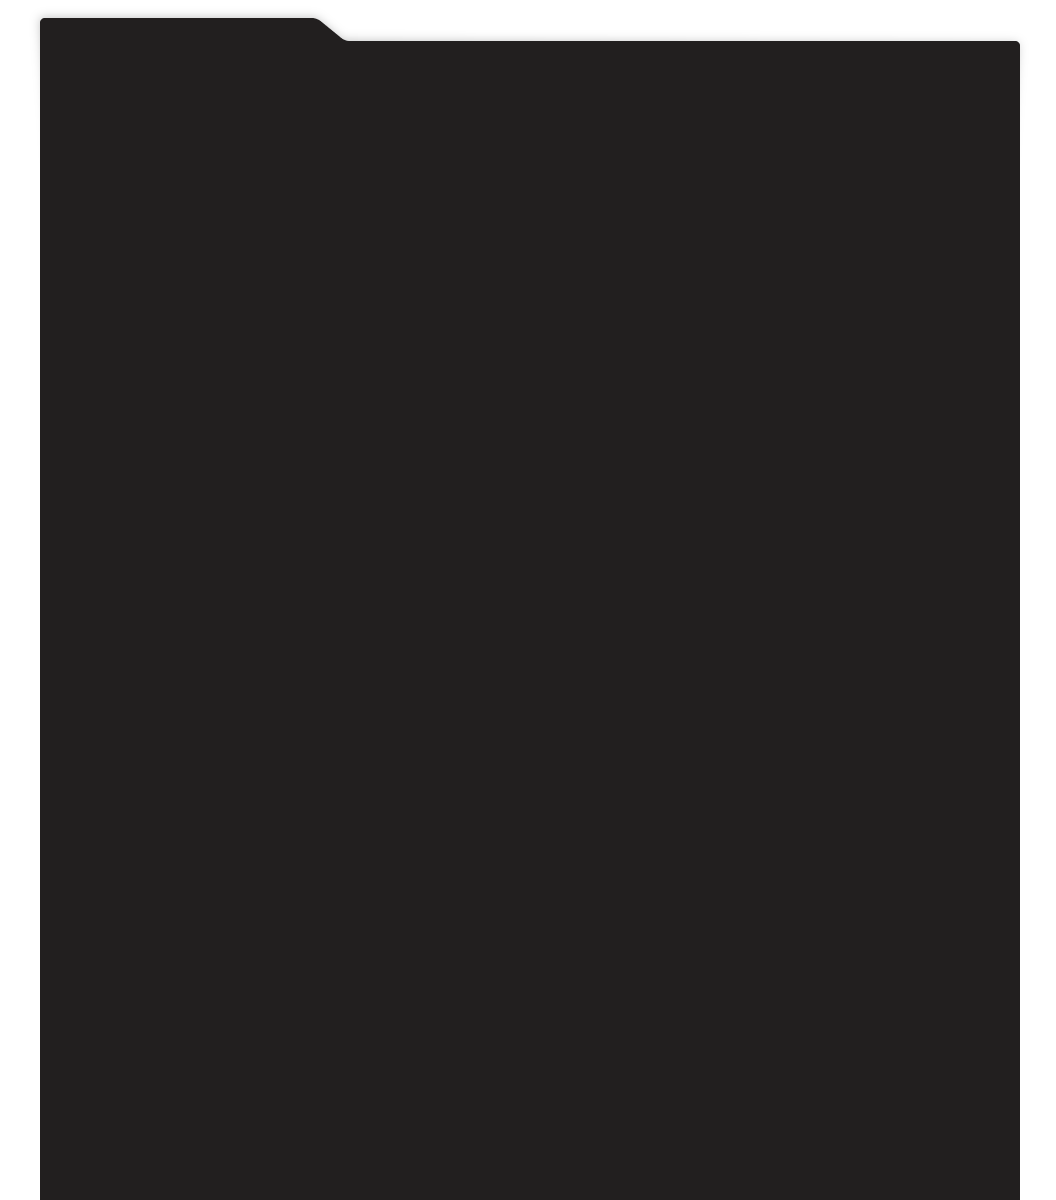
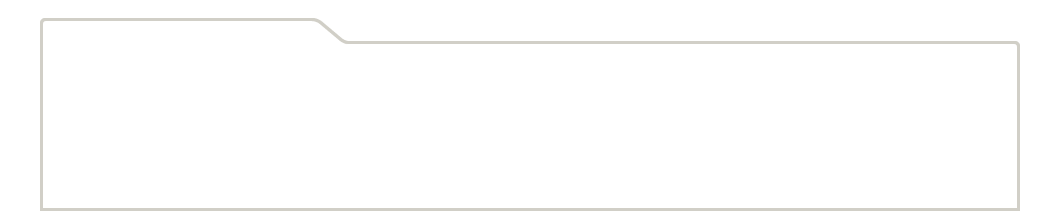
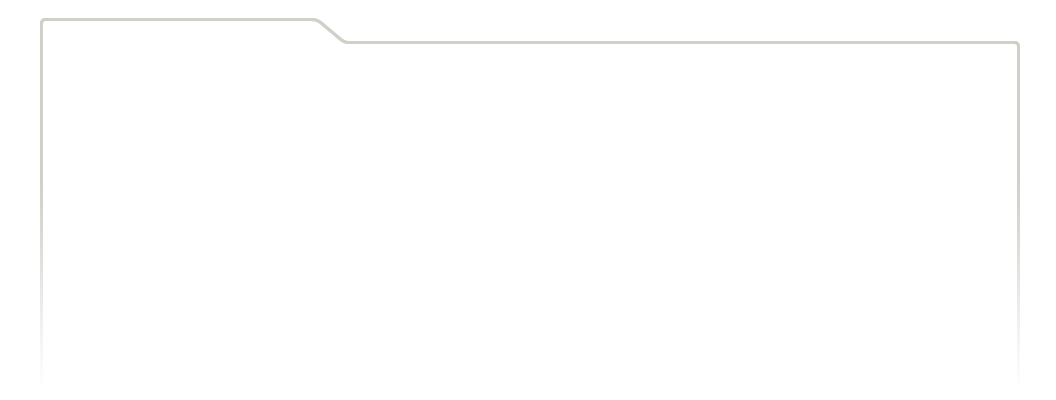
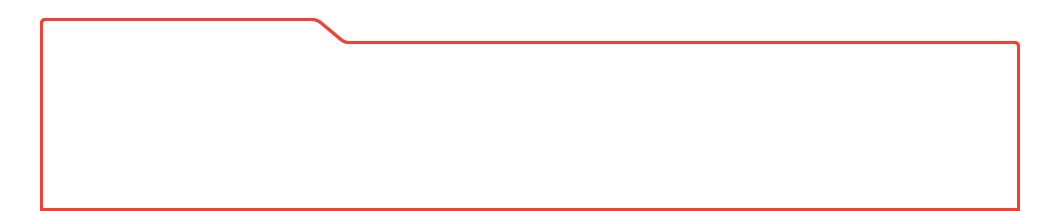
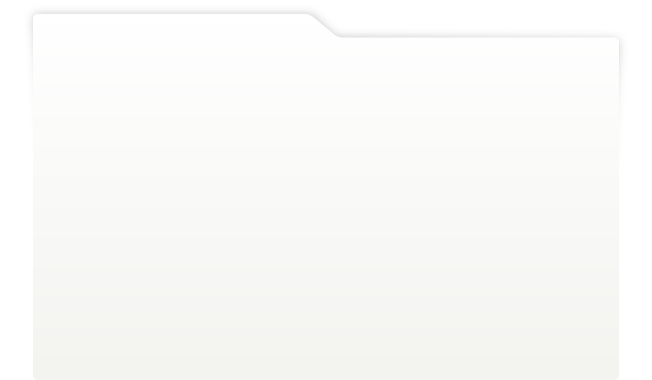
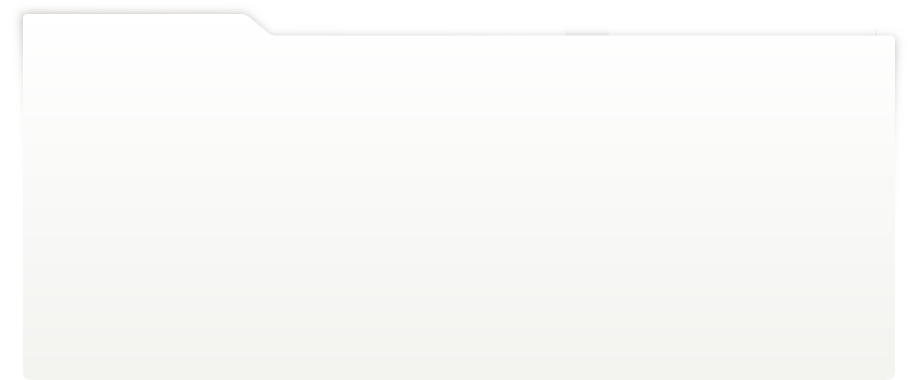
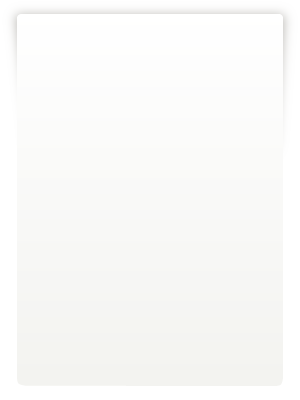
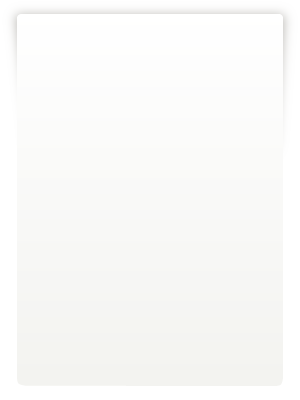
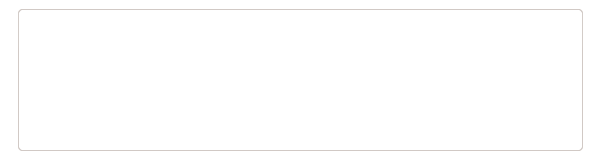
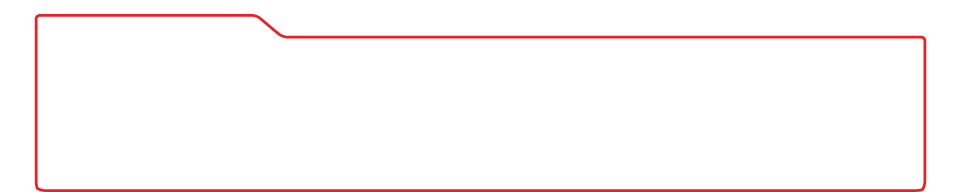
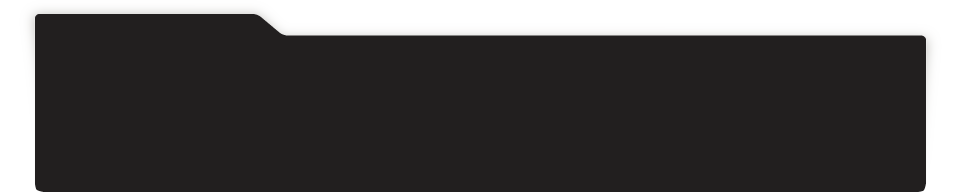
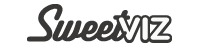
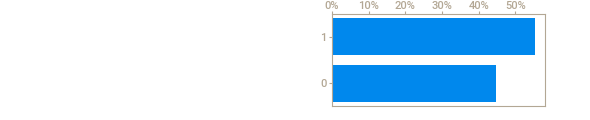
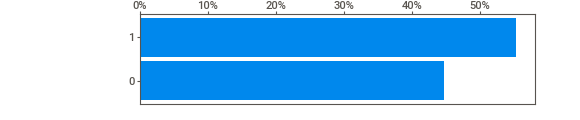
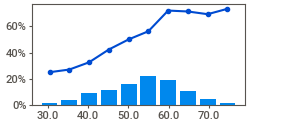
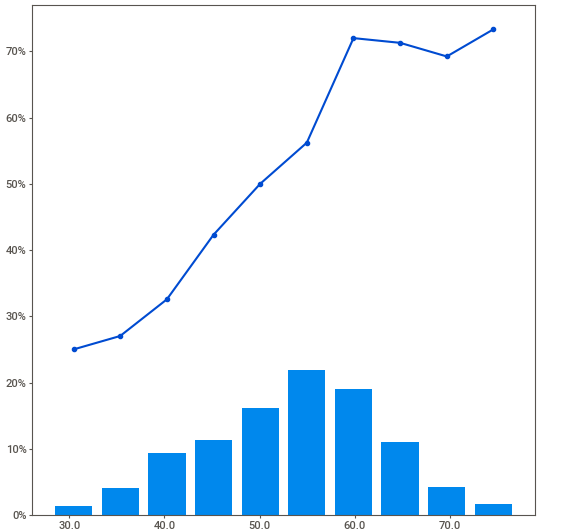
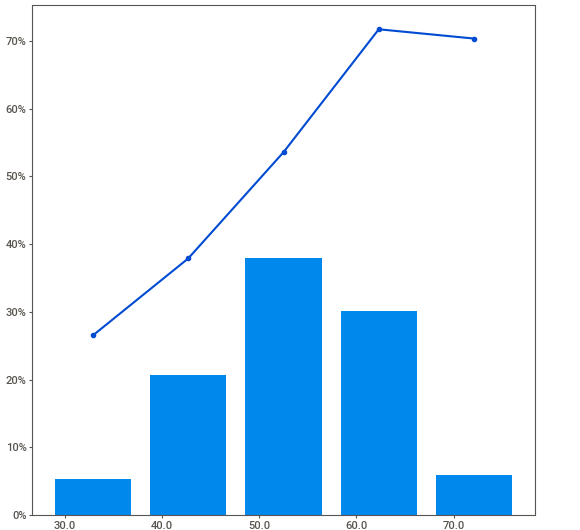
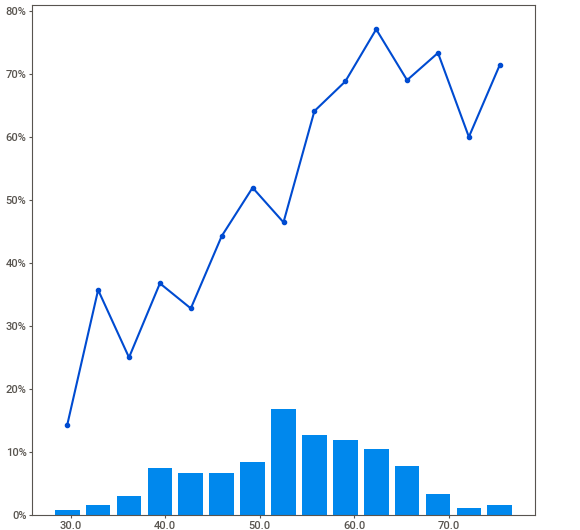
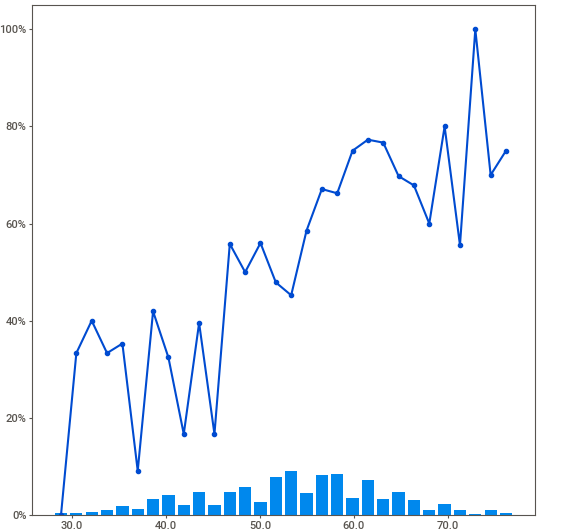
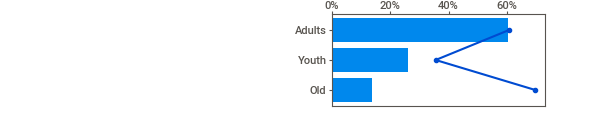
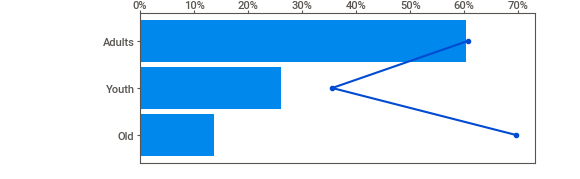
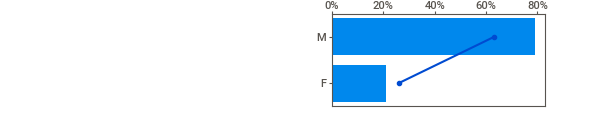
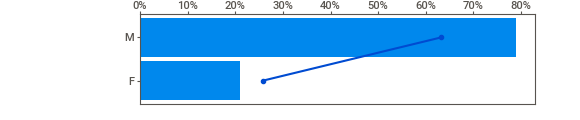
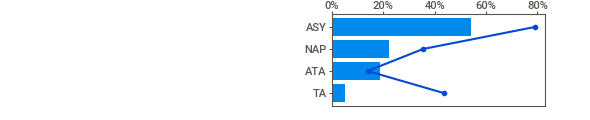
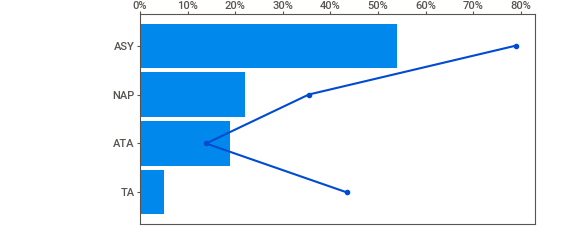
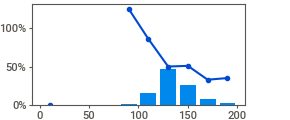
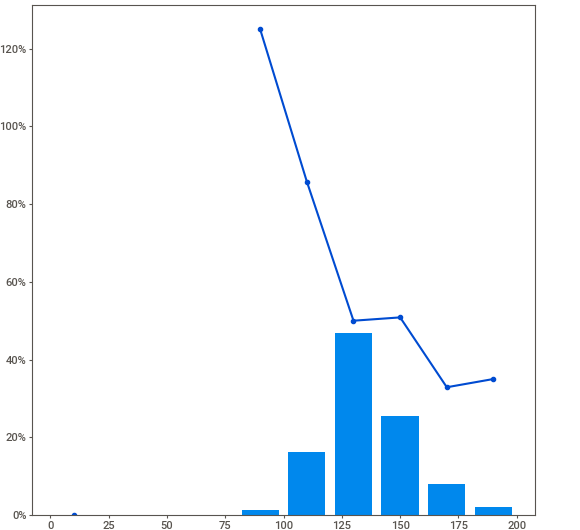
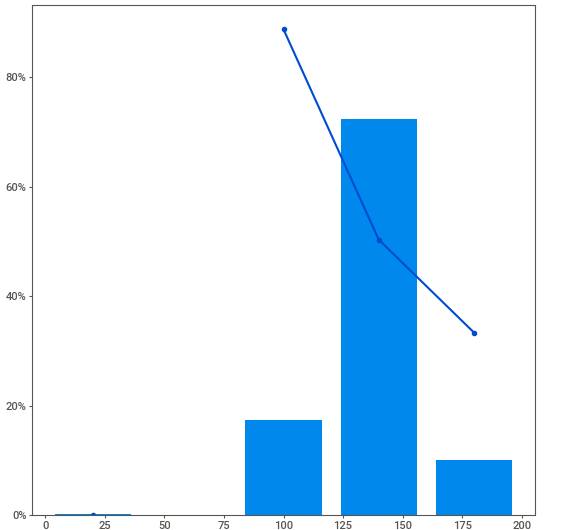
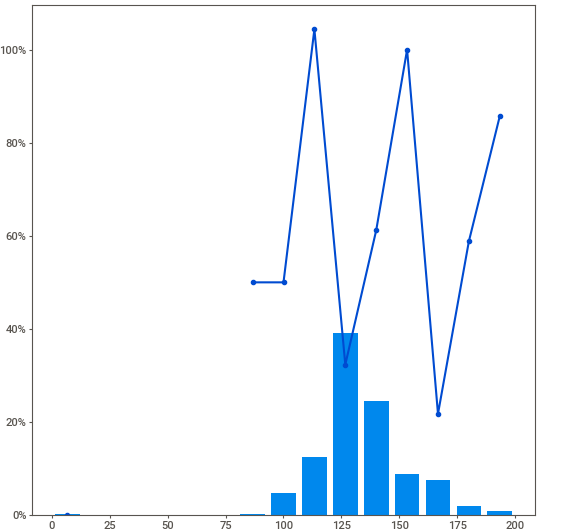
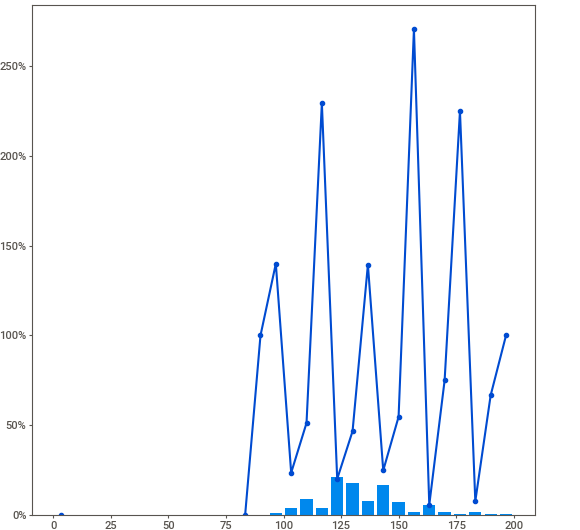
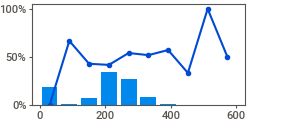
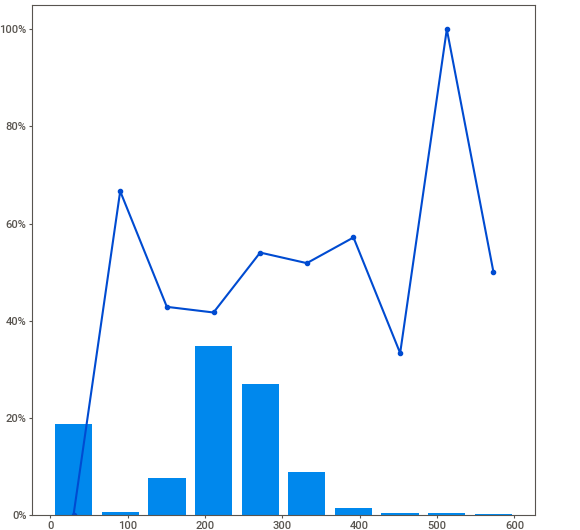
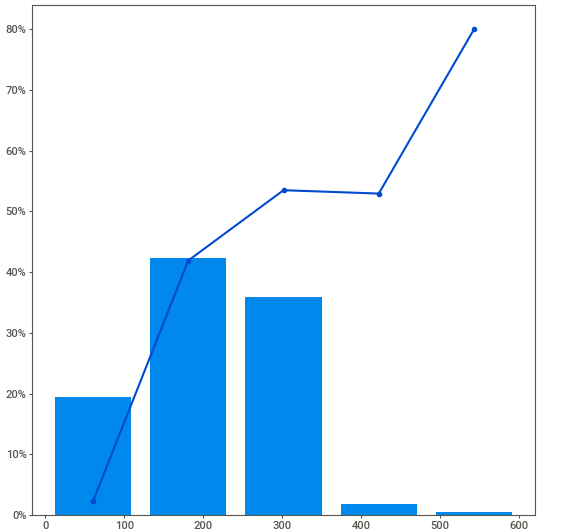
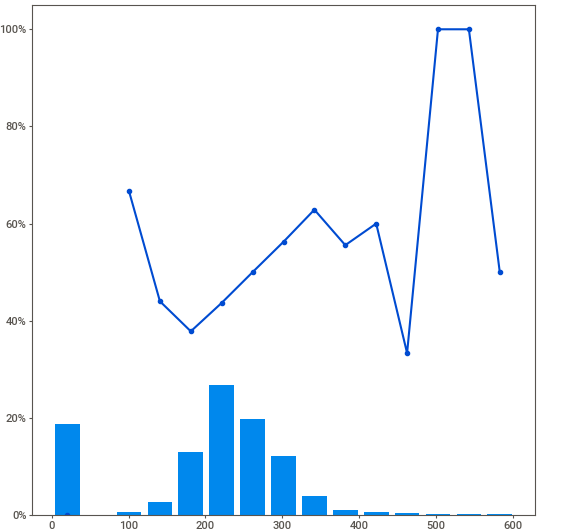
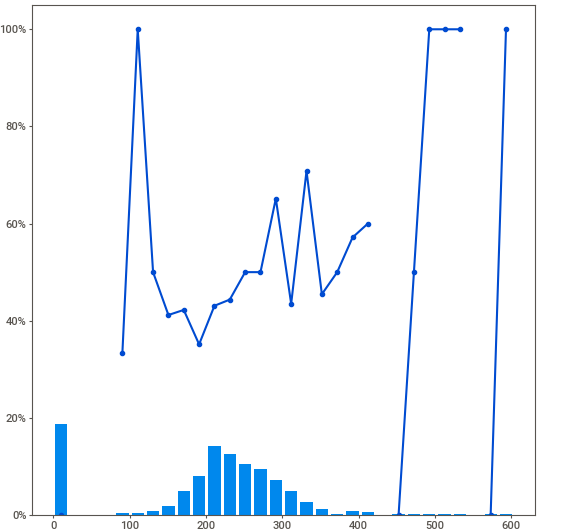
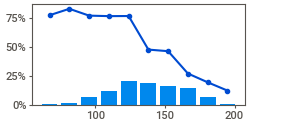
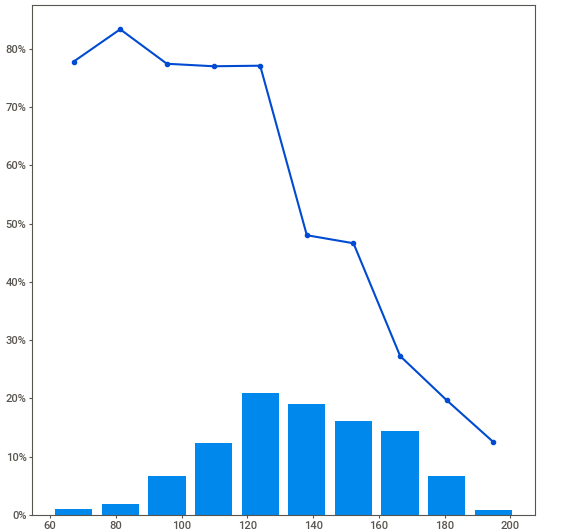
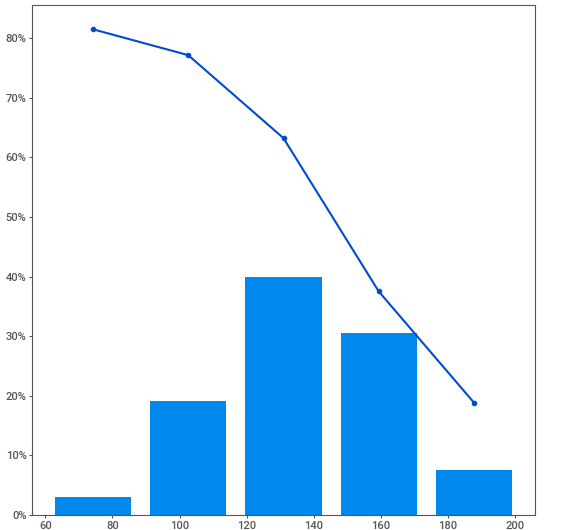
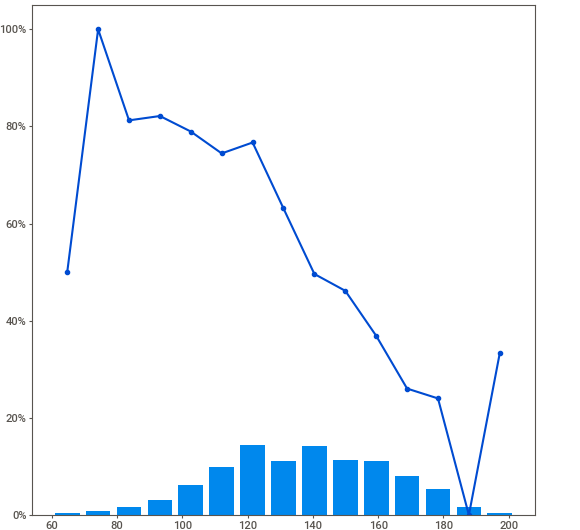
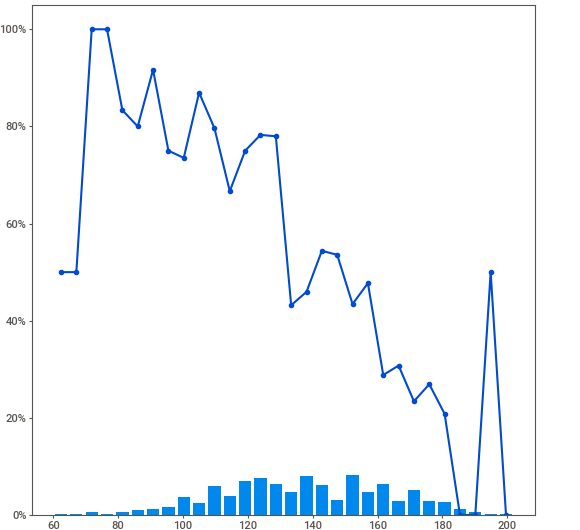
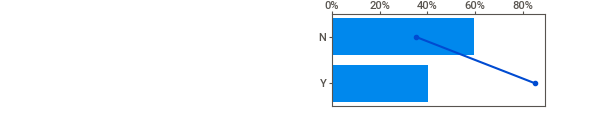
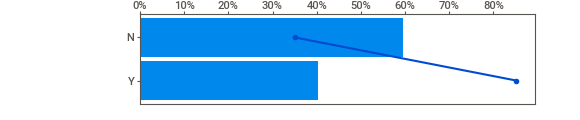
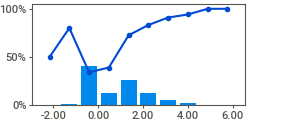
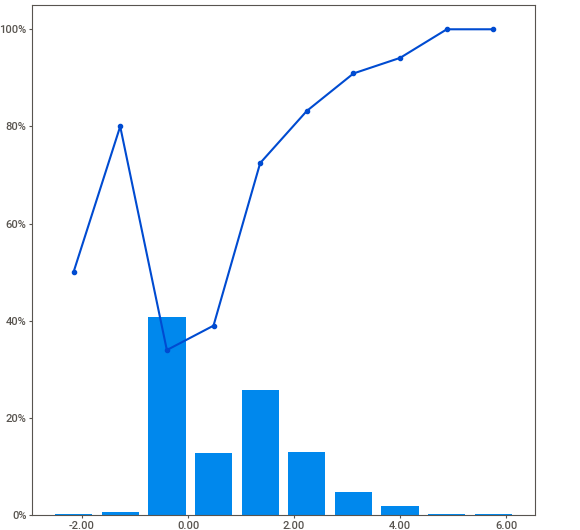
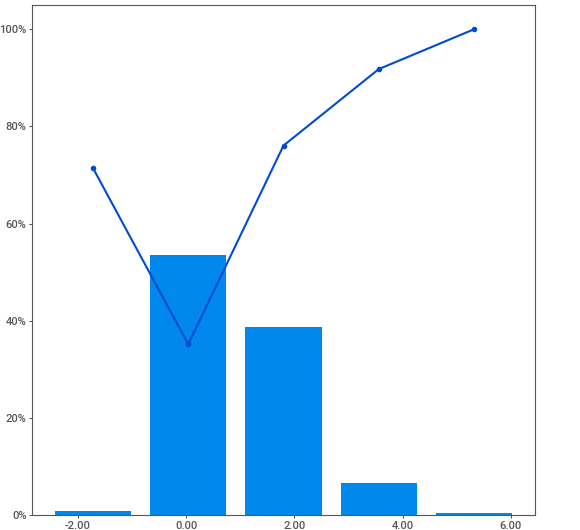
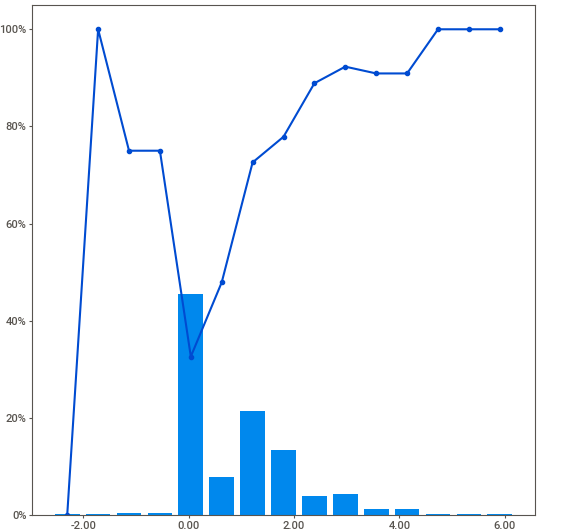
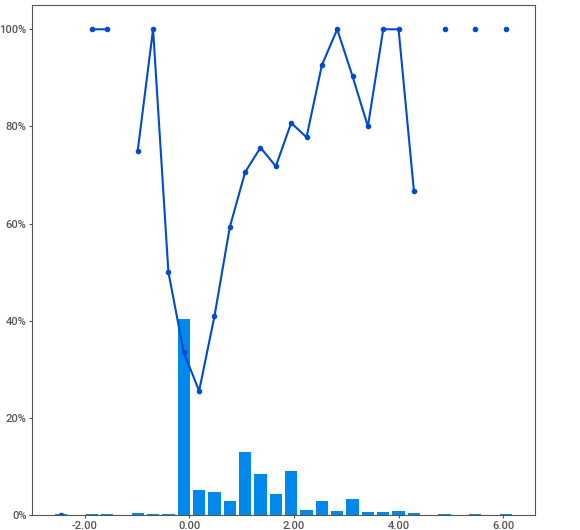
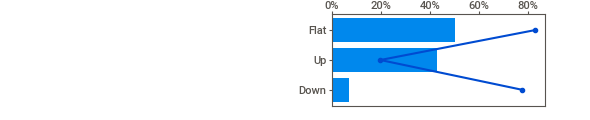
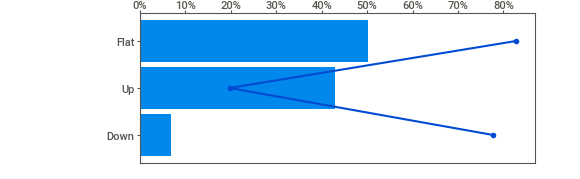
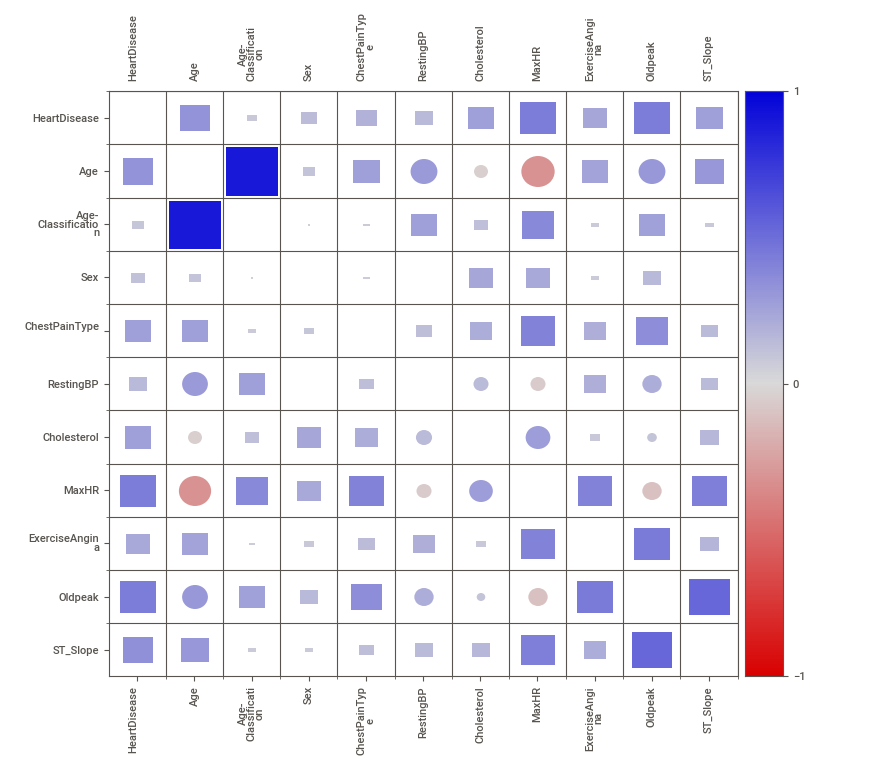
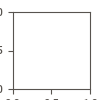

In [8]:
#Generate Sweetviz data report

datareport = sv.analyze(allData, target_feat='HeartDisease')
datareport.show_notebook(h='full')

From the Above SweetViz Report, we can that the Reseting ECG and Fasting BS column has been dropped and we see that the remain columns have assosiations with the Heart Disease Column

A new Column would be created which is the Age-Classification Column. This Column, Ages of patients would be divided into different classes such as Youth,Adults and Old

1) Youth would be ages <=48 (28-48)
2) Adults would be ages <=63 (49-63)
3) Old would be ages > 64 (64-100)


In [9]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='Sex', y='HeartDisease', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='Sex, HeartDisease histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The above Histogram visualisation plot, shows the relationship between sex and Heart Disease. Heart Disease '0' means that there is no heart disease present while Heart Disease '1' means that Heart disease is present.

The above visualisations shows that we have more Males that have Heart Disease attack than females and also we also have more Males with no heart disease attack compare to the females.

Overall,We tend to have more people with Heart Disease attack .

In [10]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(allData, x='HeartDisease', y='Age', color='HeartDisease', points='outliers')
fig.update_layout(
    title='HeartDisease, Age box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Box Plot Visualisation shows the relationship between Age and Heart Disease.This plot enables us to see the Minimum age,Maximum age,Median age of whether an individual has Heart disease attack or not.

From the above,we can see that the hightest age of an Indidivual with heart disease attack is 77,the lowest age of an individual with heart disease attack is 31 and the average age of an individual with heart disease attack is 57.

From the above visualisation,The age range between (51-62) shows the age range of individuals with Heart disease attack.

The lowest age for an individaul with no heart disease attack is age 28 while the hightest age is 76. The age range between( 43-57)shows the age range of individuals with no heart disease attack 

In [11]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(allData, x='HeartDisease', y='Age', color='Sex', points='outliers')
fig.update_layout(
    title='HeartDisease, Age box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Box Plot Visualisation above shows the relationship between Age,Sex and Heart Disease. We can see that the age group of Male with Heart disease attack are between (51-62) while for Female (51-62).

The Minimum age for a Male with Heart Disease is 34 while for Female is 33.The Hightest age of a Male with Heart disease is 77 while the hightest for a female is 73

In [12]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(allData, x='HeartDisease', y='MaxHR', color='HeartDisease', points='outliers')
fig.update_layout(
    title='HeartDisease, MaxHR box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Box Plot Visualisation above shows the relationship between Max Hr and Heart Disease.

We can deduduce that Heart rate between (112-144.5) tends to have heart disease attack while heart rate between (134-165) tends not to have heart disease attack.

The minimum heart rate for an individual with heart disease is 63 while the maximum heart rate of an individual with heart disease attack is 195.

The minimum heart rate for an individual without heart disease attack is 86 while the Maximum is 202

In [13]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='ChestPainType', y='HeartDisease', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='ChestPainType, HeartDisease histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Histogram plot above,shows the relationship between ChestPainType and Heart Disease.The highest number of heart disease attack with respect to Chest pain type is the 'ASY'.It has over 390  cases.The second highest is the 'NAP' Chest pain type with over 50 followed by the 'ATA' and the least is the 'TA'

In [14]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(allData, x='HeartDisease', y='Cholesterol', color='Sex', points='outliers')
fig.update_layout(
    title='HeartDisease, Cholesterol box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Box plot visualisation above, shows the relatioship between Cholesterol,Sex and Heart Disease attack.

From the above,Male tends to have the highest number of cholesterol and  it falls between (0-263) while female tends to have the least number of cases with cholesterol which falls between(197-305)

In [15]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='ExerciseAngina', y='HeartDisease', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='ExerciseAngina, HeartDisease histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The above Box plot Visualisation shows us the relationship between ExerciseAngina and Heart Disease.

From the above, we can deduce that an individual who does exercise tends to have Heart Disease.We can see that over 300 people that do excerecise have heart Disease  while over 150 people who do not do excersise dont have heart Disease

In [16]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='ST_Slope', y='HeartDisease', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='ST_Slope, HeartDisease histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The histogram plot above, shows the relationship between ST_Slope and Heart Disease.

We can deduce that ST_Slope 'Flat' has the highest number of heart disease with over 350 cases while the second highest is the ST_Slope 'Up' with over 50 cases while the least is the Down

In [17]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='Age', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='Age histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Visualisation plot above shows the various age distribution with respect to having or not having heart disease attack.

We can deduce that from age age 28-45, we have less number of individuals with heart disease attack,ages-46-64 we tend to have high number of individuals with heart disease attack and also we have less number of heart disease attack from ages 65 and above.


In [18]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(allData, x='Age-Classification', y='HeartDisease', color='HeartDisease', histfunc='count')
fig.update_layout(
    title='Age-Classification, HeartDisease histogram', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

The Visualisation plot above shows the age distribution into categories.

The ages categories are
1) Youth would be ages <=48 (28-48)
2) Adults would be ages <=63 (49-63)
3) Old would be ages > 64 (64-100)

From the above Visualisation, we can deduce that we tend to have more Adults with heart disease attack and this falls between the ages of (49-63).The Youth and Old almost have the same number hearth disease attack

In [19]:
#Save dataframe back to CSV file

allData.to_csv('HeartDiseaseEDA.csv', index=False)